In [1]:
import numpy as np
import matplotlib.pyplot as plt

import MDAnalysis as mda
from MDAnalysis.analysis.density import DensityAnalysis
from gridData import Grid

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm

import MDAnalysis as mda

In [ ]:
PDB = 'glut3/glut3_holo1.start.gro' #"glut3_holo.start.gro" #structure
XTC = 'glut3/glut3_holo1.skip250.xtc' #"glut3_holo.xtc" #trajectory
u = mda.Universe(PDB,XTC)
top=u.select_atoms('resid 53 and name CG').center_of_geometry()
bottom = u.select_atoms('resid 244 and name OD2').center_of_geometry()
print(top[2],bottom[2])

In [81]:
#Using here GLUT3 simulations published in Qureshi et al. Nature (2020)
dir="glut3/"
protname="glut3_holo"

In [82]:
colors = plt.cm.Blues(np.linspace(0, 1, 10 ))

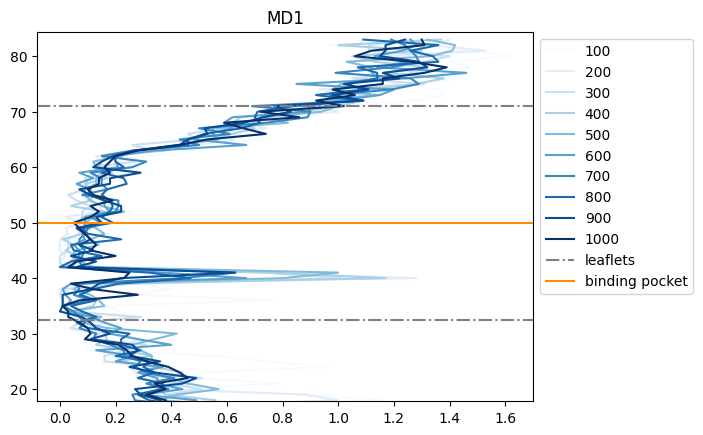

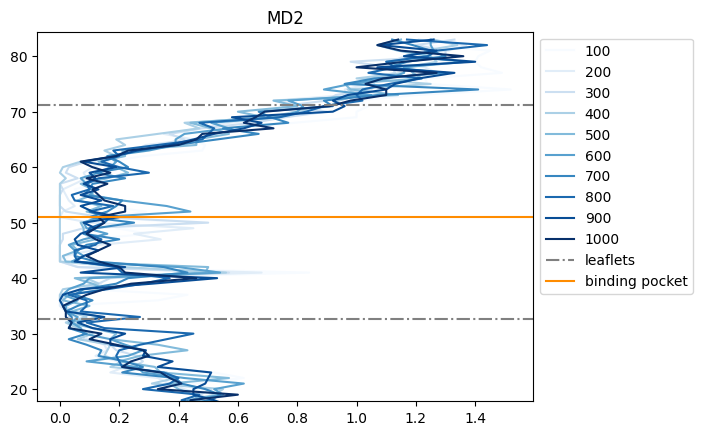

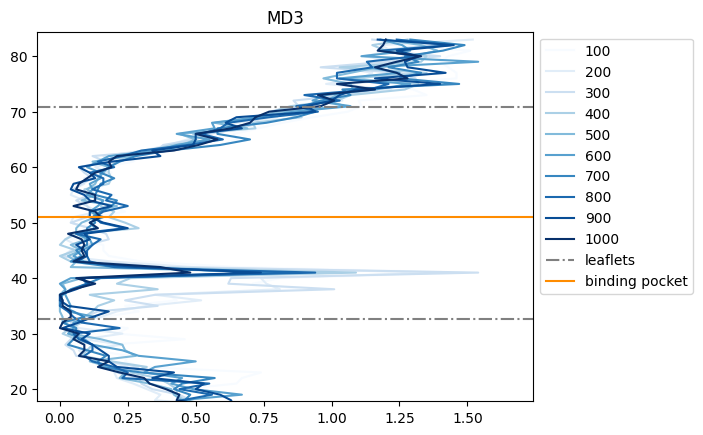

In [95]:
for i in range(1,4):
    u = mda.Universe(dir+protname+str(i)+".start.gro",\
                    dir+protname+str(i)+".skip250.xtc")
    cogprot = u.select_atoms('protein').center_of_geometry()

    ow = u.select_atoms('(cyzone 15 40 -40 protein ) and name OW')

    upper_leaflet_pos=u.select_atoms("name P and prop z >= 50.0").center_of_geometry()
    lower_leaflet_pos=u.select_atoms("name P and prop z < 50.0").center_of_geometry()

    z_upper_leaflet=int(upper_leaflet_pos[2])
    z_lower_leaflet=int(lower_leaflet_pos[2])

    #print (z_upper_leaflet, z_lower_leaflet)

    ##Select center of geometry of sugar binding pocket
    pos = u.select_atoms("resid 159 or resid 280 or resid 281 or resid 286 or resid 315 or resid 386").center_of_geometry()
    pos_int = [np.around(i).astype(int) for i in pos] 
    #print ('this is the center of the pocket in initial structure', pos_int)

    start_t=0
    count = 0
    plt.figure()
    ##Analysis every 100 ns
    for t in [100,200,300,400,500,600,700,800,900,1000]:
        #print (int(t))
        stop_t=int(t)

        #print (start_t,stop_t)
        D = DensityAnalysis(ow, delta=1.0)
        D.run(start=start_t,stop=stop_t)


        #D.results.density.convert_density('TIP3P')

        D.results.density.export("water%s.dx" %t, type="double")
  
        #print ('density shape =', D.results.density.grid.shape)
        #print ('density sum =', D.results.density.grid.sum())
        #print ('done')

        #print ('shape of grid =',D.results.density.grid.shape )
    
        Zdensity=D.results.density.grid

    #    print ('sum on axis 2 shape =',Zdensity.shape)
        plt.plot(Zdensity.sum(axis=0).sum(axis=0),range(len(Zdensity.sum(axis=0).sum(axis=0))), color=colors[count],label=int(t))

        start_t=stop_t
        count=count+1

    plt.axhline(y=lower_leaflet_pos[2],linestyle='-.', color='gray',label='leaflets')
    plt.axhline(y=upper_leaflet_pos[2],linestyle='-.', color='gray')
    plt.axhline(y=pos_int[2],linestyle='-', color='darkorange',label='binding pocket')
    #plt.axhline(y=cogprot[2],linestyle='-', color='blue',label='protein cog')
    plt.ylim(bottom[2],top[2])

    plt.legend()
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title('MD'+str(i))